In [1]:
import pandas as pd
import numpy as np
import pickle
from mood.base.sequence import Sequence


In [2]:
native = Sequence(sequence="HNPVVMVHGMGGASYNFASIKSYLV", chain="A", index=0, parent=False, child=False, active=True),

sequences = {
    "A":
    {
        "HNPVVMVHGMGGASYNFASIKSYLV": Sequence(sequence="HNPVVMVHGMGGASYNFASIKSYLV", chain="A", index=0, parent=False, child=False, active=True), 
        "HNPVVMVHGMGGASYNFASIKSLLV": Sequence(sequence="HNPVVMVHGMGGASYNFASIKSLLV", chain="A", index=1, parent=False, child=False, active=True, native=native),
        "HNPVVMVHGMGGASYNFASIKSSLV": Sequence(sequence="HNPVVMVHGMGGASYNFASIKSSLV", chain="A", index=2, parent=False, child=False, active=True, native=native),
        "HNPVVMVHGMGGASYNFASIKSVLV": Sequence(sequence="HNPVVMVHGMGGASYNFASIKSVLV", chain="A", index=3, parent=False, child=False, active=True, native=native),
        "HNPVVMVHGMGGASYNFASIKSKLV": Sequence(sequence="HNPVVMVHGMGGASYNFASIKSKLV", chain="A", index=4, parent=False, child=False, active=True, native=native),
    }
}
with open("sequences.pkl", "wb") as f:
    pickle.dump(sequences, f)

In [3]:
seq_index = [0,1,2,3,4]
sequence = ["HNPVVMVHGMGGASYNFASIKSYLV", "HNPVVMVHGMGGASYNFASIKSYLV", "HNPVVMVHGMGGASYNFASIKSYLV", "HNPVVMVHGMGGASYNFASIKSYLV", "HNPVVMVHGMGGASYNFASIKSYLV"]
iteration = [1,2,3,4,5]
metric1 = [-2, -6, -1, -1, -5]
metric2 = [-1, -6, -1, -3, -5]
rank = [1, 2, 3, 4, 5]
df = pd.DataFrame({'seq_index': seq_index, 'Sequence': sequence, 'iteration': iteration, 'metric1': metric1, 'metric2': metric2, 'Rank': rank})
dataframes = {"A": df}
with open("data_frame.pkl", "wb") as f:
    pickle.dump(dataframes, f)

In [4]:

SEQ1 = Sequence(
    sequence="ATG",
    chain="A",
    index=1,
    active=True,
    parent=None,
    child=None,
    native=None,
)
SEQ2 = Sequence(
    sequence="TGG",
    chain="A",
    index=2,
    active=True,
    parent=None,
    child=None,
    native=SEQ1,
)
SEQ3 = Sequence(
    sequence="GAT",
    chain="A",
    index=3,
    active=True,
    parent=None,
    child=None,
    native=SEQ1,
)
SEQUENCES_C = {
    "A": {
        SEQ1.sequence: SEQ1,
        SEQ2.sequence: SEQ2,
        SEQ3.sequence: SEQ3,
    }
}

In [5]:
params = ["data/7R1K/7R1K_unref.pdb", "7R1K/7R1K_ref.pdb", "01_population.out"]
params = ",".join(params)
params

'data/7R1K/7R1K_unref.pdb,7R1K/7R1K_ref.pdb,01_population.out'

In [6]:
#### Get triad residue indexes
index_offset = 0
triad_residues = [(76+index_offset, 'A'), (155+index_offset, 'A'), (132+index_offset, 'A')]
his_ser_atom = 'NE2'
his_acid_atom = 'ND1'
acid_type = 'D'

# Get PDB indexes
ser = triad_residues[0]
his = triad_residues[1]
acd = triad_residues[2]

distances = {
    'SER_LIG' : [(ser[1], ser[0], 'OG'), ('L', 8, 'C1')],
    'SER_HIS' : [(ser[1], ser[0], 'OG'),(his[1], his[0], his_ser_atom)],
    'HIS_ASP' : [(his[1], his[0], his_acid_atom),(acd[1], acd[0], 'O'+acid_type+'1')]
}

distances

{'SER_LIG': [('A', 76, 'OG'), ('L', 8, 'C1')],
 'SER_HIS': [('A', 76, 'OG'), ('A', 155, 'NE2')],
 'HIS_ASP': [('A', 155, 'ND1'), ('A', 132, 'OD1')]}

In [7]:
def distance(pose, atom1, atom2):
    a1 = np.array(pose.residue(atom1[0]).xyz(atom1[1]))
    a2 = np.array(pose.residue(atom2[0]).xyz(atom2[1]))
    return np.linalg.norm(a1 - a2)

In [35]:
import pyrosetta as prs
import os
params_folder = "/home/lavane/Users/acanella/Repos/multiObjectiveOptimizationDesign/tests/data/Felip9/PET_params"
if params_folder != None:
        patches = [
            params_folder + "/" + x
            for x in os.listdir(params_folder)
            if x.endswith(".txt")
        ]
        params = [
            params_folder + "/" + x
            for x in os.listdir(params_folder)
            if x.endswith(".params")
        ]
        if patches == []:
            patches = None
        if params == []:
            raise ValueError(
                f"Params files were not found in the given folder: {params_folder}!"
            )

# from a list of path files, create a string with all the paths separated by a coma
params = " ".join(params)
patches = " ".join(patches)

options = f"-relax:default_repeats 1 -constant_seed true -jran {12345}"
options += f" -extra_res_fa {params} -extra_patch_fa {patches}"

prs.pyrosetta.init(options=options)

┌──────────────────────────────────────────────────────────────────────────────┐
│                                 PyRosetta-4                                  │
│              Created in JHU by Sergey Lyskov and PyRosetta Team              │
│              (C) Copyright Rosetta Commons Member Institutions               │
│                                                                              │
│ NOTE: USE OF PyRosetta FOR COMMERCIAL PURPOSES REQUIRE PURCHASE OF A LICENSE │
│         See LICENSE.PyRosetta.md or email license@uw.edu for details         │
└──────────────────────────────────────────────────────────────────────────────┘
PyRosetta-4 2024 [Rosetta PyRosetta4.conda.linux.cxx11thread.serialization.CentOS.python312.Release 2024.15+release.d972b59c530a12affcbe0eb4a24eedc3ce7d5060 2024-04-02T17:06:29] retrieved from: http://www.pyrosetta.org
core.init: Checking for fconfig files in pwd and ./rosetta/flags
core.init: Rosetta version: PyRosetta4.conda.linux.cxx11thread.seria

In [9]:
native_pose = prs.pose_from_pdb("/home/lavane/Users/acanella/Repos/multiObjectiveOptimizationDesign/tests/data/Felip9/FeLip9-PET-1.pdb")

core.chemical.GlobalResidueTypeSet: Finished initializing fa_standard residue type set.  Created 987 residue types
core.chemical.GlobalResidueTypeSet: Total time to initialize 0.634723 seconds.
core.import_pose.import_pose: File '/home/lavane/Users/acanella/Repos/multiObjectiveOptimizationDesign/tests/data/Felip9/FeLip9-PET-1.pdb' automatically determined to be of type PDB
core.conformation.Conformation: appending residue by a chemical bond in the foldtree: 182 TPA anchor:  O1   181 root:  C1
core.conformation.Conformation: appending residue by a chemical bond in the foldtree: 183 ETY anchor:  C8   182 root:  O3
core.conformation.Conformation: appending residue by a chemical bond in the foldtree: 184 TPA anchor:  O1   183 root:  C1
core.conformation.Conformation: appending residue by a chemical bond in the foldtree: 185 ETY anchor:  C8   184 root:  O3
core.conformation.Conformation: appending residue by a chemical bond in the foldtree: 186 TPA anchor:  O1   185 root:  C1
core.conformat

In [23]:
distances

{'SER_LIG': [('A', 76, 'OG'), ('L', 8, 'C1')],
 'SER_HIS': [('A', 76, 'OG'), ('A', 155, 'NE2')],
 'HIS_ASP': [('A', 155, 'ND1'), ('A', 132, 'OD1')]}

In [22]:
import json

with open("distances.json", "w") as f:
    json.dump(distances, f)

In [11]:
# see if the distances dictionary has a list of tuples of 3 elements or 2 elements
from icecream import ic
d = distances.copy()
for key, value in distances.items():
    if len(value[0]) == 3:
        natom1 = native_pose.pdb_info().pdb2pose(value[0][0], value[0][1])
        natom2 = native_pose.pdb_info().pdb2pose(value[1][0], value[1][1])
        d[key] = [(natom1, value[0][2]), (natom2, value[1][2])]

In [12]:
import json
with open("distances.json", "w") as f:
    json.dump(d, f)

In [13]:
import numpy as np
res_distance = d.copy()
for key, value in d.items():
    res_distance[key] = distance(pose=native_pose, atom1=value[0], atom2=value[1])

In [14]:
res_distance

{'SER_LIG': 2.90552163991253,
 'SER_HIS': 2.990364191866937,
 'HIS_ASP': 3.4389129096271116}

In [15]:
import pickle, os
file_path = "/home/lavane/Users/acanella/Repos/multiObjectiveOptimizationDesign/tests/data/7R1K/distance.pkl"
if os.path.getsize(file_path) > 0:  # Check if file is not empty
    with open(file_path, "rb") as file:
        dist = pickle.load(file)
else:
    dist = None  # Handle the case where the file is empty
dist

{'LIG_H_CYS_S': [(161, 'HSG'), (35, 'SG')],
 'LIG_O_GLN_H': [(161, 'OE1'), (69, 'HE22')]}

In [16]:
import json
with open("/home/lavane/Users/acanella/Repos/multiObjectiveOptimizationDesign/tests/data/Felip9/design_library_glide.json", "r") as f:
    data = json.load(f)

data

{'1': ['P', 'E'],
 '2': ['P', 'H'],
 '3': ['N'],
 '4': ['P'],
 '5': ['I', 'V'],
 '6': ['I', 'V'],
 '7': ['L', 'F', 'M'],
 '8': ['V'],
 '9': ['H'],
 '10': ['G'],
 '11': ['F', 'W', 'I'],
 '12': ['D', 'C', 'G'],
 '13': ['N', 'G'],
 '14': ['R', 'S', 'A'],
 '17': ['N'],
 '18': ['F', 'W'],
 '19': ['W', 'F'],
 '20': ['P', 'T', 'W', 'S'],
 '21': ['L', 'M', 'W', 'I'],
 '22': ['A', 'R', 'K'],
 '23': ['R', 'P', 'S'],
 '24': ['R', 'Y'],
 '25': ['L', 'F'],
 '26': ['W', 'A'],
 '27': ['A', 'T'],
 '28': ['W', 'Q'],
 '29': ['G'],
 '30': ['W'],
 '34': ['H', 'Q'],
 '35': ['L', 'V'],
 '36': ['H', 'F', 'W', 'Y'],
 '37': ['A'],
 '38': ['F', 'W', 'I'],
 '39': ['N', 'D', 'T'],
 '40': ['L', 'F', 'Y'],
 '41': ['G', 'I'],
 '42': ['W', 'D'],
 '45': ['G'],
 '46': ['D', 'S', 'N'],
 '47': ['N'],
 '48': ['R', 'D', 'E'],
 '49': ['D', 'N'],
 '50': ['S', 'Y', 'N'],
 '51': ['A', 'G'],
 '52': ['E', 'P'],
 '53': ['Q', 'R'],
 '54': ['I', 'L'],
 '55': ['A', 'S'],
 '57': ['H', 'F', 'Y'],
 '58': ['I', 'V'],
 '59': ['D', 'E', '

In [17]:
import random
n=2
s_resu = {}
for s in range(10):
    #creates a list starting from 0 to n
    r = random.choice(list(range(n+1)))
    s_resu[s] = {}
    if r != 0:
        for i in range(r):
            rk = random.choice(list(data.keys()))
            rv = random.choice(data[rk])
            s_resu[s][rk] = rv
s_resu

{0: {},
 1: {'1': 'P'},
 2: {'168': 'I', '80': 'M'},
 3: {'67': 'A', '164': 'V'},
 4: {'25': 'L', '53': 'Q'},
 5: {},
 6: {'13': 'N', '150': 'I'},
 7: {'68': 'Q', '140': 'S'},
 8: {'1': 'P', '64': 'A'},
 9: {}}

In [18]:
s_resu

{0: {},
 1: {'1': 'P'},
 2: {'168': 'I', '80': 'M'},
 3: {'67': 'A', '164': 'V'},
 4: {'25': 'L', '53': 'Q'},
 5: {},
 6: {'13': 'N', '150': 'I'},
 7: {'68': 'Q', '140': 'S'},
 8: {'1': 'P', '64': 'A'},
 9: {}}

In [19]:
import pyrosetta as prs
def local_relax(
        pose,
        residues=None,
        moving_chain=None,
        neighbour_distance=10,
        minimization_steps=100,
        min_energy_threshold=2,
    ):
        residues = residues or []
        min_pose = pose.clone()

        sfxn = prs.rosetta.core.scoring.ScoreFunctionFactory.create_score_function("ref2015")
        
        fastrelax_mover = prs.rosetta.protocols.relax.FastRelax()
        fastrelax_mover.set_scorefxn(sfxn)

        if moving_chain is not None:
            chain_indexes = []
            for r in range(1, pose.total_residue() + 1):
                _, chain = pose.pdb_info().pose2pdb(r).split()
                if chain == moving_chain:
                    chain_indexes.append(r)
        else:
            chain_indexes = []

        # indexes seria mutations
        ct_chain_selector = prs.rosetta.core.select.residue_selector.ResidueIndexSelector()
        indexes = chain_indexes + residues
        ct_chain_selector.set_index(",".join([str(x) for x in indexes]))

        nbr_selector = (
            prs.rosetta.core.select.residue_selector.NeighborhoodResidueSelector()
        )

        # Residue of the mutation
        nbr_selector.set_focus_selector(ct_chain_selector)
        nbr_selector.set_include_focus_in_subset(
            True
        )  # This includes the peptide residues in the selection
        nbr_selector.set_distance(neighbour_distance)

        enable_mm = prs.rosetta.core.select.movemap.move_map_action(1)

        mmf_relax = prs.rosetta.core.select.movemap.MoveMapFactory()
        mmf_relax.all_bb(False)
        mmf_relax.add_bb_action(enable_mm, nbr_selector)

        ## Deactivate side-chain except for the selected chain during relax + neighbours
        mmf_relax.all_chi(False)
        mmf_relax.add_chi_action(enable_mm, nbr_selector)

        # Define RLT to prevent repacking of residues (fix side chains)
        prevent_repacking_rlt = prs.rosetta.core.pack.task.operation.PreventRepackingRLT()
        # Define RLT to only repack residues (movable side chains but fixed sequence)
        restrict_repacking_rlt = (
            prs.rosetta.core.pack.task.operation.RestrictToRepackingRLT()
        )

        # Prevent repacking of everything but CT, peptide and their neighbours
        prevent_subset_repacking = (
            prs.rosetta.core.pack.task.operation.OperateOnResidueSubset(
                prevent_repacking_rlt, nbr_selector, True
            )
        )
        # Allow repacking of peptide and neighbours
        restrict_subset_to_repacking_for_sampling = (
            prs.rosetta.core.pack.task.operation.OperateOnResidueSubset(
                restrict_repacking_rlt, nbr_selector
            )
        )

        tf_sampling = prs.rosetta.core.pack.task.TaskFactory()
        tf_sampling.push_back(prevent_subset_repacking)
        tf_sampling.push_back(restrict_subset_to_repacking_for_sampling)

        fastrelax_mover.set_movemap_factory(mmf_relax)
        fastrelax_mover.set_task_factory(tf_sampling)

        print("Running minimisation")
        initial_energy = sfxn(min_pose)
        print(f"\tInitial energy: {initial_energy:.2f}")
        for step in range(1, minimization_steps + 1):
            print(f"Running minimization step {step} of {minimization_steps}")
            fastrelax_mover.apply(min_pose)
            final_energy = sfxn(min_pose)
            d_energy = final_energy - initial_energy
            print(f"Finished minimization cycle {step} of {minimization_steps}")
            print(f"Energy change (dE):{d_energy:.2f}")
            print(f"\tCurrent energy: {final_energy:.2f}")
            if abs(d_energy) < abs(min_energy_threshold):
                print("Energy convergence achieved.")
                break
            initial_energy = final_energy

        if step == minimization_steps - 1:
            print(f"Maximum number of relax iterations ({minimization_steps}) reached.")
            print("Energy convergence failed!")

        print("Finished minimisation:")

        return min_pose

In [20]:

local_relax(pose=native_pose, sfxn=sfxn, residues=[1,2,3])



NameError: name 'sfxn' is not defined

In [ ]:
import pyrosetta
from pyrosetta import pose_from_pdb

# Initialize PyRosetta
pyrosetta.init()

# Load a pose from a PDB file
pose = native_pose  # Replace with your PDB file

# Iterate over all residues in the pose
for i in range(1, pose.total_residue() + 1):
    residue = pose.residue(i)
    print(f"Residue {i} ({residue.name3()}):")

    # Iterate over all atoms in the residue
    for atom_index in range(1, residue.natoms() + 1):
        pdb_atom_name = residue.atom_name(atom_index).strip()  # Get the Rosetta atom name
        rosetta_atom_index = residue.atom_index(pdb_atom_name)  # Map to the Rosetta atom index
        print(f"PDB Atom Name: {pdb_atom_name} -> Rosetta Atom Index: {rosetta_atom_index}")


In [53]:
ligand_res = native_pose.residue(132)
print(ligand_res)
atom_names = [ligand_res.atom_name(i) for i in range(1, ligand_res.natoms() + 1)]

Residue 132: ASP (ASP, D):
Base: ASP
 Properties: POLYMER PROTEIN CANONICAL_AA SC_ORBITALS POLAR CHARGED NEGATIVE_CHARGE METALBINDING ALPHA_AA L_AA
 Variant types:
 Main-chain atoms:  N    CA   C  
 Backbone atoms:    N    CA   C    O    H    HA 
 Side-chain atoms:  CB   CG   OD1  OD2 1HB  2HB 
Atom Coordinates:
   N  : -2.137, -0.609, -20.332
   CA : -2.409, 0.67, -19.675
   C  : -1.589, 1.73, -20.442
   O  : -0.358, 1.749, -20.359
   CB : -2.026, 0.641, -18.194
   CG : -2.344, 1.944, -17.473
   OD1: -2.333, 2.97, -18.111
   OD2: -2.593, 1.901, -16.293
   H  : -1.262, -1.057, -20.08
   HA : -3.48, 0.907, -19.727
  1HB : -2.558, -0.171, -17.697
  2HB : -0.959, 0.44, -18.098
Mirrored relative to coordinates in ResidueType: FALSE



In [47]:
s = "HNPVVMVHGMGGASYNFASIKSYLVTQGWDRNQLFAIDFIDKTGNNRNNGPRLSRMVKDVLGKTGAKKVDIVAHSMGGANTLYYIKNLDGGDKIENVVTLGGANGLVSLRALPGTDPNQKGSYTSVYSSADMIVVNSLSRLIGARNVLIHGVGHISLLASSQVKGYIKEGLNGGGQNTNLE"
print(s[35])
print(len(s))

A
181


In [3]:
import json
with open("Felip9/design_library_glide.json", "r") as f:
    design = json.load(f)
design

{'1': ['P', 'E'],
 '2': ['P', 'H'],
 '3': ['N'],
 '4': ['P'],
 '5': ['I', 'V'],
 '6': ['I', 'V'],
 '7': ['L', 'F', 'M'],
 '8': ['V'],
 '9': ['H'],
 '10': ['G'],
 '11': ['F', 'W', 'I'],
 '12': ['D', 'C', 'G'],
 '13': ['N', 'G'],
 '14': ['R', 'S', 'A'],
 '17': ['N'],
 '18': ['F', 'W'],
 '19': ['W', 'F'],
 '20': ['P', 'T', 'W', 'S'],
 '21': ['L', 'M', 'W', 'I'],
 '22': ['A', 'R', 'K'],
 '23': ['R', 'P', 'S'],
 '24': ['R', 'Y'],
 '25': ['L', 'F'],
 '26': ['W', 'A'],
 '27': ['A', 'T'],
 '28': ['W', 'Q'],
 '29': ['G'],
 '30': ['W'],
 '34': ['H', 'Q'],
 '35': ['L', 'V'],
 '36': ['H', 'F', 'W', 'Y'],
 '37': ['A'],
 '38': ['F', 'W', 'I'],
 '39': ['N', 'D', 'T'],
 '40': ['L', 'F', 'Y'],
 '41': ['G', 'I'],
 '42': ['W', 'D'],
 '45': ['G'],
 '46': ['D', 'S', 'N'],
 '47': ['N'],
 '48': ['R', 'D', 'E'],
 '49': ['D', 'N'],
 '50': ['S', 'Y', 'N'],
 '51': ['A', 'G'],
 '52': ['E', 'P'],
 '53': ['Q', 'R'],
 '54': ['I', 'L'],
 '55': ['A', 'S'],
 '57': ['H', 'F', 'Y'],
 '58': ['I', 'V'],
 '59': ['D', 'E', '

In [7]:
mutable_aa = {"A": design}
offset = 1
mutable_aa = {
    chain: {int(pos) - offset: aa for pos, aa in positions.items()}
    for chain, positions in mutable_aa.items()
}

In [52]:
seq1 = 'HNPVVMVHGMGGASYNFASIKSYLVTQGWDRNQLFAIDFIDKTGNNRNNGPRLSRMVKDVLGKTGAKKVDIVAHSMGGANTLYYIKNLGGGDKIENVVTLGGANGLVSLRALPGTDPNQKGSYTSVYSSADMIVVNSLSRLIGARNVLIHGVGHISLLASSQVKGYIKEGLNGGGQNTNLE'
seq2 = 'HNPVVMVHGMGGASYNFASIKSYLVTQGWDRNQLFAIDFIDKTGNNRNNGPRLSRMVKDVLGKTGAKKVDIVAHSMGGANTLYYIKNLDGGDKIENVVTLGGANGLVSLRALPGTDPNQKGSYTSVYSSADMIVVNSLSRLIGARNVLIHGVGHISLLASSQVKGYIKEGLNGGGQNTNLE'

if seq1 != seq2:
    print("Different")
else:
    print("Equal")
    
print(seq1[86], seq2[86])

Different
N N


In [37]:
pose = prs.pose_from_pdb("/home/lavane/Users/acanella/Repos/multiObjectiveOptimizationDesign/tests/data/Felip9/decoy_R2_I4_0.pdb")
sfxn = prs.rosetta.core.scoring.ScoreFunctionFactory.create_score_function("ref2015")
sfxn(pose)

core.chemical.GlobalResidueTypeSet: Finished initializing fa_standard residue type set.  Created 987 residue types
core.chemical.GlobalResidueTypeSet: Total time to initialize 0.64296 seconds.
core.import_pose.import_pose: File '/home/lavane/Users/acanella/Repos/multiObjectiveOptimizationDesign/tests/data/Felip9/decoy_R2_I4_0.pdb' automatically determined to be of type PDB
core.conformation.Conformation: appending residue by a chemical bond in the foldtree: 182 TPA anchor:  O1   181 root:  C1
core.conformation.Conformation: appending residue by a chemical bond in the foldtree: 183 ETY anchor:  C8   182 root:  O3
core.conformation.Conformation: appending residue by a chemical bond in the foldtree: 184 TPA anchor:  O1   183 root:  C1
core.conformation.Conformation: appending residue by a chemical bond in the foldtree: 185 ETY anchor:  C8   184 root:  O3
core.conformation.Conformation: appending residue by a chemical bond in the foldtree: 186 TPA anchor:  O1   185 root:  C1
core.conformat

-602.1656132857826

In [38]:
import pickle
with open("/home/lavane/Users/acanella/Repos/multiObjectiveOptimizationDesign/mood_job_iter2/000/data_frame.pkl", "rb") as f:
    design = pickle.load(f)

In [41]:
design["A"]

,Sequence,Index,Relax Energy,Interface Score,Apo Score,Hydrophobic Score,Salt Bridges,dist_SER_LIG,dist_SER_HIS,dist_HIS_ASP,Ranks
0,EHNPVVMVHGIGGASYNFFSIKSYLATQGWDRNQLYAIDFIDKTGN...,0,-600.385273,-45.125113,-550.987570,1882.945167,8,2.905522,2.990364,3.438913,1
1,EHNPVVMVHGIGGSSYNFFPIKSYLATQGWDRNQVYAIDFGDKTGN...,1,-577.714729,-43.489307,-529.154702,1712.524043,8,2.905522,2.990364,3.438913,1
2,EHNPVVMVHGICGASYNFFPIKSYLWTQGWDRNQVYAIDFGDKTGN...,2,-566.534810,-42.658955,-519.521831,1865.606678,8,2.905522,2.990364,3.438913,2
3,EHNPVVMVHGIGNSSYNFFPIKSYLATQGWDRNQVYAIDFGDKTGN...,3,-565.305275,-41.784362,-518.781379,1855.483962,8,2.905522,2.990364,3.438913,2
4,EHNPVVMVHGWGGASYNFFPIKSRLATQGWDRNQVYAIDFGDKTGN...,4,-561.106971,-43.699597,-512.232714,1774.505339,8,2.905522,2.990364,3.438913,1
5,EHNPVVMVHGIGGSSYNFFPIKSYLATQGWDRNQVYAIDFGDKTGN...,5,-569.095875,-43.140395,-521.818132,1720.348936,7,2.905522,2.990364,3.438913,1
6,EHNPVVMVHGIGNSSYNFWTIKSRLATQGWDRNQVFAIDFGDKTGN...,6,-584.691523,-43.585057,-535.623269,1940.597270,7,2.905522,2.990364,3.438913,1
7,EHNPVVMVHGIGNSSYNFFPIKSYLATWGWDRNQVYAIDFGDKTGN...,7,-530.474550,-42.738532,-482.522068,2133.693324,7,2.905522,2.990364,3.438913,3
8,EHNPVVMVHGIGNSSYNFFPIKSYLATWGWDRNQVYAIDFGDKTGN...,8,-506.759133,-41.609163,-460.722047,2148.153958,7,2.905522,2.990364,3.438913,4
9,EHNPIVMVHGIGGSSYNFFPIKSYLATQGWDRNQVFAIDFGDKTGN...,9,-562.978152,-40.897180,-517.713301,1571.794461,7,2.905522,2.990364,3.438913,1


In [ ]:
path = "../../mood_job-f"
df_folders = {}
for folder in os.listdir(path):
    if os.path.isdir(path + "/" + folder) and folder.startswith("0"):
        df_folders[folder] = {}
        with open(path + "/" + folder + "/data_frame.pkl", "rb") as f:
            df = pickle.load(f)
            for chain, data in df.items():
                df_folders[folder][chain] = data
df_folders

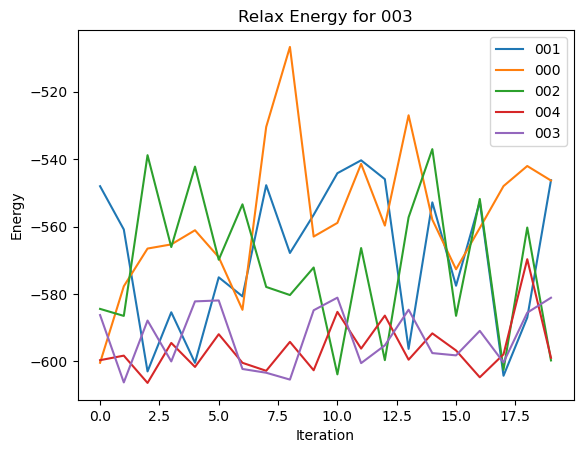

In [64]:
# plot the df_folders[folders]["A"]["Relax Energy"] for each folder
import matplotlib.pyplot as plt
energy = []
for folder, data in df_folders.items():
    for chain, df in data.items():
        energy.append(df["Relax Energy"])
# Add title and labels
plt.title(f"Relax Energy for {folder}")
plt.xlabel("Iteration")
plt.ylabel("Energy")
# add legend
plt.legend(df_folders.keys())
plt.show()
        